In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr


from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor



import tensorflow as tf
from tensorflow import keras as tfk



2023-10-13 09:26:28.439630: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
prices = pd.read_csv('Data_PCLab4_Stock_Price.csv')
volumes = pd.read_csv('Data_PCLab4_Stock_Volume.csv')

# make the date the index
prices.Date = pd.to_datetime(prices.Date)
prices.set_index('Date', inplace=True)

volumes.Date = pd.to_datetime(volumes.Date)
volumes.set_index('Date', inplace=True)

# Task 1

### volumes analysis

Average trading volume for AAPL:  58203317.4


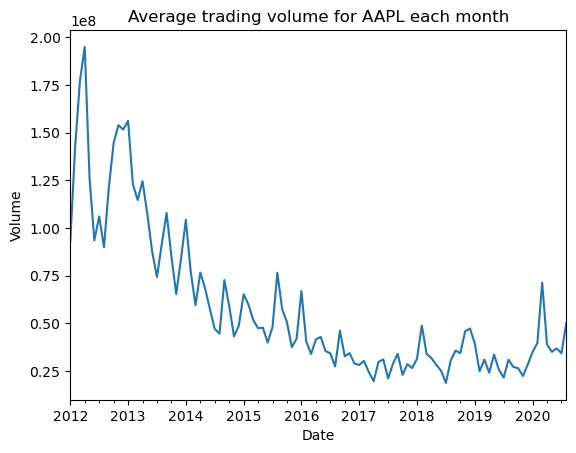

In [3]:
# print the average trading volume for AAPL
print('Average trading volume for AAPL: ', volumes['AAPL'].mean().round(1))

# plot the average trading volume for AAPL each month
volumes.resample('M').AAPL.mean().plot()
plt.title('Average trading volume for AAPL each month')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


Maximum trading volume for sp500:  9044690000


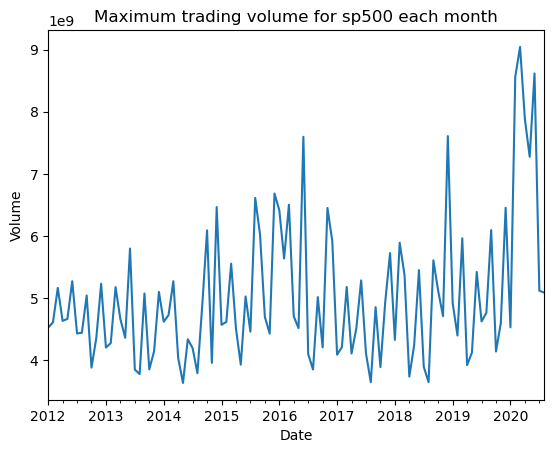

In [4]:
# print the maximum trading volume for sp500
print('Maximum trading volume for sp500: ', volumes['sp500'].max())

# plot the maximum trading volume for sp500 each month
volumes.resample('M').sp500.max().plot()
plt.title('Maximum trading volume for sp500 each month')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


### Volumes time series

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>]], dtype=object)

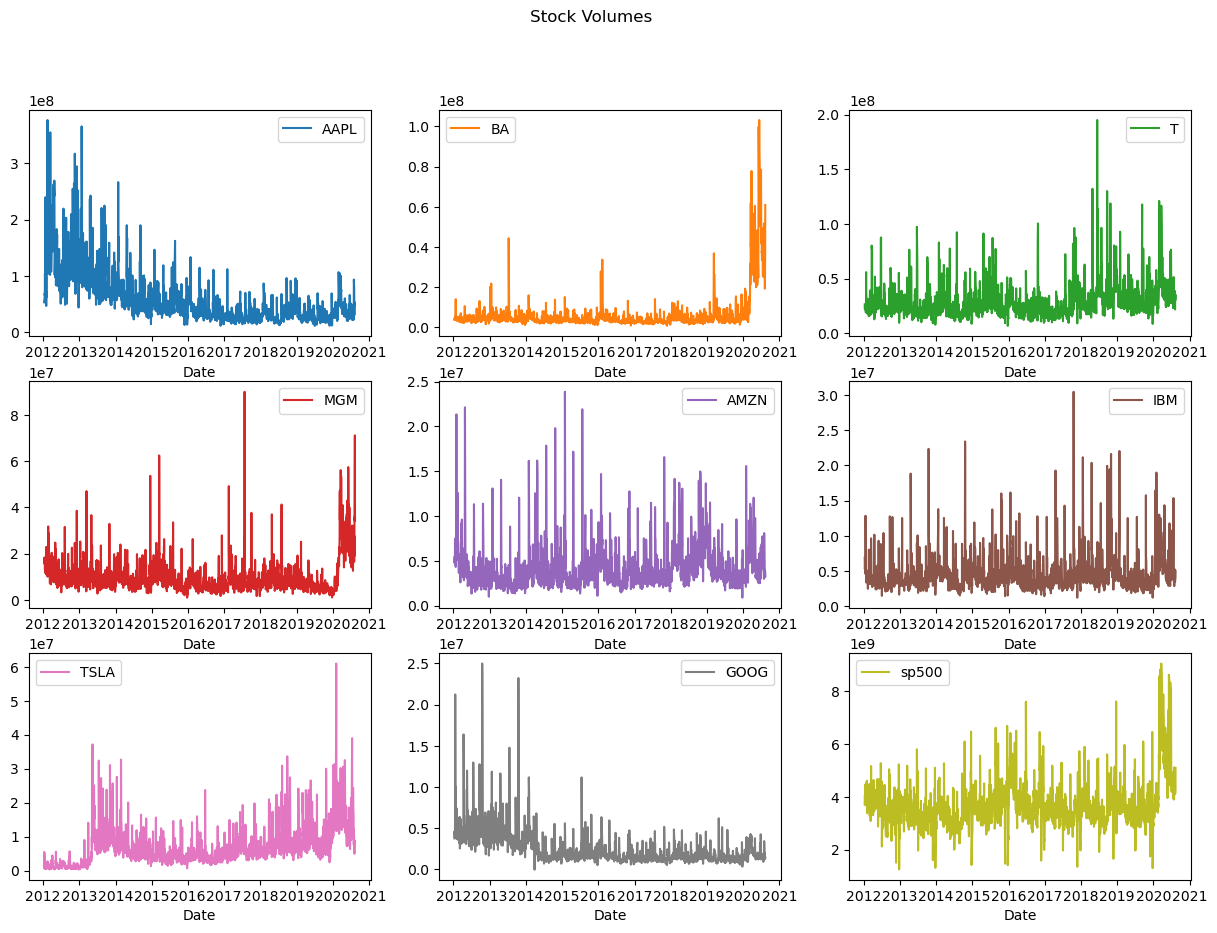

In [5]:

volumes.plot(figsize=(15,10), subplots=True, layout=(3,3), sharex=False, sharey=False, title='Stock Volumes')


array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>]], dtype=object)

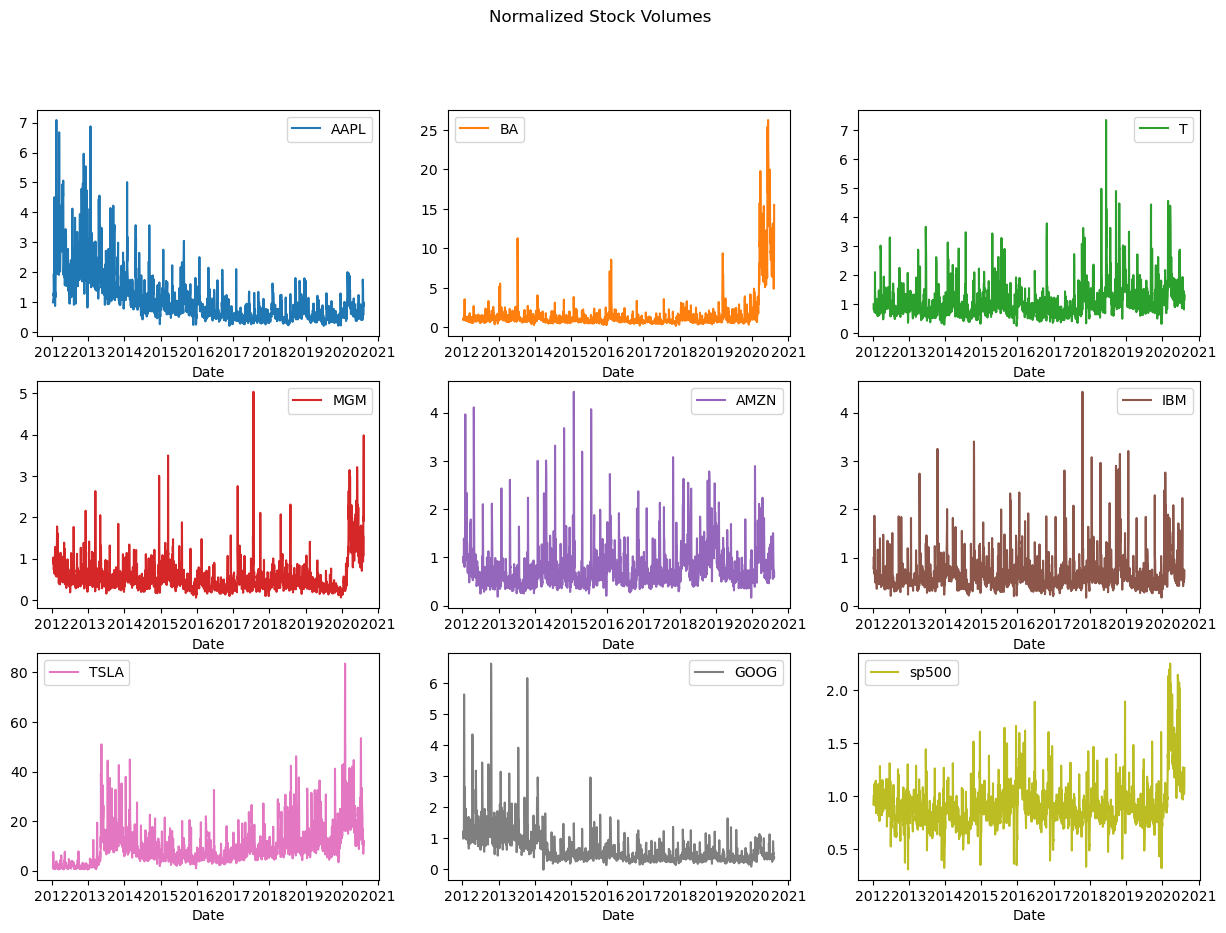

In [6]:
def normalize(df):
    return df / df.iloc[0, :]

volume_norm = normalize(volumes)

volume_norm.plot(figsize=(15,10), subplots=True, layout=(3,3), sharex=False, sharey=False, title='Normalized Stock Volumes')

### Correlation between the features

In [7]:
def daily_change(df):
    return df.pct_change(1)

price_daily = prices.apply(daily_change)[1:]
volume_daily = volumes.apply(daily_change)[1:]

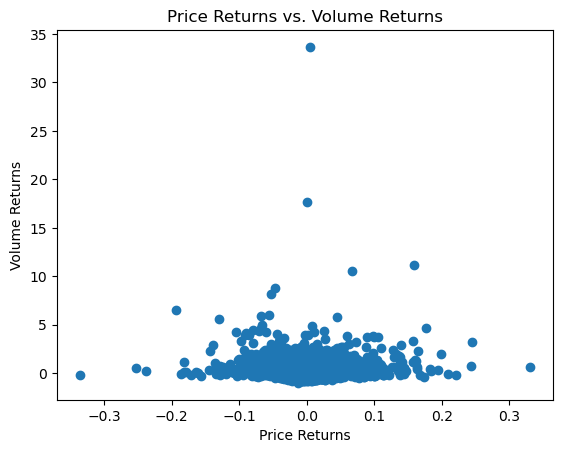

In [8]:
#give me correlation between daily and volume changes for each stock, and an aggregated measure
correlation = price_daily.corrwith(volume_daily).sort_values(ascending=True)

plt.scatter(price_daily, volume_daily)
plt.xlabel('Price Returns')
plt.ylabel('Volume Returns')
plt.title('Price Returns vs. Volume Returns')
plt.show()

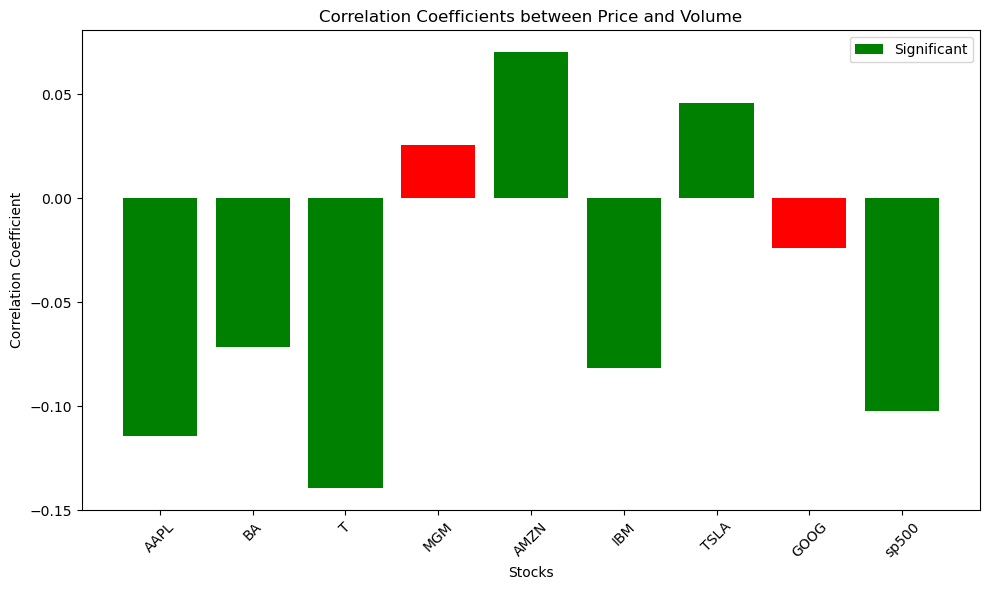

In [9]:
# Initialize empty lists to store the results
correlation_coefficients = []
p_values = []

# Iterate through the columns (stocks)
for stock in price_daily.columns:
    price_column = stock
    volume_column = stock

    # Calculate the correlation coefficient
    correlation_coefficient, p_value = pearsonr(price_daily[price_column], volume_daily[volume_column])

    # Append the results to the lists
    correlation_coefficients.append(correlation_coefficient)
    p_values.append(p_value)

# Create an array for x-axis (stock names) and y-axis (correlation coefficients)
stocks = price_daily.columns
correlations = np.array(correlation_coefficients)

# Create a boolean mask to identify statistically significant correlations
significant_mask = np.array(p_values) < 0.05

# Create a list of colors based on the significant_mask
colors = np.where(significant_mask, 'g', 'r')

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(stocks, correlations, color=colors)
plt.xlabel('Stocks')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Price and Volume')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Add a legend for color coding
plt.legend(['Significant', 'Non-significant'], loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


Overall, the correlation between price returns and volume returns is not uniform across different stocks, highlighting the importance of individual stock analysis. Additionally, these results demonstrate that volume and price behavior can be influenced by various factors, such as investor sentiment, news events, or company-specific information.

# Task 2

In [11]:
# Update column levels for prices
prices.columns = pd.MultiIndex.from_product([prices.columns, ['price']])

# Update column levels for volumes
volumes.columns = pd.MultiIndex.from_product([volumes.columns, ['volume']])

df = pd.concat([prices, volumes], axis=1).sort_index(axis=1)

#split the data into train and test, 75% training and 25% test
training_data, test_data = train_test_split(df, test_size=0.25, shuffle=False)

AAPL                  AMZN                  BA           \
                price    volume       price   volume      price   volume   
Date                                                                       
2012-01-12  60.198570  53146800  175.929993  5385800  75.510002  3934500   
2012-01-13  59.972858  56505400  178.419998  4753500  74.599998  4641100   
2012-01-17  60.671429  60724300  181.660004  5644500  75.239998  3700100   
2012-01-18  61.301430  69197800  189.440002  7473500  75.059998  4189500   
2012-01-19  61.107143  65434600  194.449997  7096000  75.559998  5397300   

                  GOOG                   IBM             MGM            \
                 price    volume       price   volume  price    volume   
Date                                                                     
2012-01-12  313.644379   3764400  180.550003  6881000  12.13  17891100   
2012-01-13  311.328064   4631800  179.160004  5279200  12.35  16621800   
2012-01-17  313.116364   3832800  180.000000  6003400  12.25  15480800   
2012-01-18  315.273285   5544000  181.070007  4600600  12.73  18387600   
2012-01-19  318.590851  12657800  180.520004  8567200  12.80  14022900   

                    T                 TSLA                 sp500              
                price    volume      price   volume        price      volume  
Date                                                                          
2012-01-12  30.120001  26511100  28.250000   729300  1295.500000  4019890000  
2012-01-13  30.070000  22096800  22.790001  5500400  1289.089966  3692370000  
2012-01-17  30.250000  23500200  26.600000  4651600  1293.670044  4010490000  
2012-01-18  30.330000  22015000  26.809999  1260200  1308.040039  4096160000  
2012-01-19  30.420000  25524000  26.760000  1246300  1314.500000  4465890000

In [13]:
scalers = {}  # to store scalers for each stock and measure

training_data_sc = training_data.copy()
test_data_sc = test_data.copy()


for stock in training_data.columns.levels[0]:
    for measure in ['price', 'volume']:
        sc = MinMaxScaler(feature_range=(0, 1))
        training_data_sc[stock, measure] = sc.fit_transform(training_data_sc[stock, measure].values.reshape(-1, 1))
        scalers[(stock, measure)] = sc

for stock in test_data.columns.levels[0]:
    for measure in ['price', 'volume']:
        sc = MinMaxScaler(feature_range=(0, 1))
        test_data_sc[stock, measure] = sc.fit_transform(test_data_sc[stock, measure].values.reshape(-1, 1))
        scalers[(stock, measure)] = sc


## OLS

In [58]:
def train_and_predict_ols(training_data_sc, test_data_sc):
    new_df = pd.DataFrame()

    for stock in training_data_sc.columns.levels[0]:
        extract = training_data_sc.shift(1).dropna()[stock][['price', 'volume']].reset_index(drop=True).rename(columns={'price':'price_lag1', 'volume':'volume_lag1'})
        price = training_data_sc[stock][['price']][1:].reset_index(drop=True)
        extract = pd.concat([extract,price],axis=1)
        new_df=pd.concat([new_df, extract],axis=0)


    # Generate predictor matrix (X) and response vector (y) for training
    X_train = new_df[['price_lag1', 'volume_lag1']]
    X_train = sm.add_constant(X_train)
    y_train = new_df['price']  
    
    
    # 2. Train a single OLS model using this dataset
    model = sm.OLS(y_train, X_train).fit()
    
    new_df = pd.DataFrame()

    for stock in test_data_sc.columns.levels[0]:
        extract = test_data_sc.shift(1).dropna()[stock][['price', 'volume']].reset_index(drop=True).rename(columns={'price':'price_lag1', 'volume':'volume_lag1'})
        price = test_data_sc[stock][['price']][1:].reset_index(drop=True)
        extract = pd.concat([extract,price],axis=1)
        new_df=pd.concat([new_df, extract],axis=0)


    # 3. Predict using this single model
    predictions_sc = pd.DataFrame(index=test_data_sc.index[1:], columns=test_data_sc.columns)
    for stock in test_data_sc.columns.levels[0]:
        X_test = test_data_sc[stock][['price', 'volume']].shift(1).dropna()
        X_test = sm.add_constant(X_test)
        predictions_sc[stock] = model.predict(X_test)
    
    # Remove the volume column from the predictions
    predictions_sc = predictions_sc.xs('price', axis=1, level=1).dropna()

    # Inverse transform the predictions
    predictions = pd.DataFrame(index=predictions_sc.index, columns=predictions_sc.columns)

    for stock in predictions_sc.columns:
        predictions[stock] = scalers[(stock, 'price')].inverse_transform(predictions_sc[stock].values.reshape(-1, 1))

    return predictions, model


# Example usage:
predictions_ols, model_ols = train_and_predict_ols(training_data_sc, test_data_sc)

## Ridge

In [59]:

def train_and_predict_ridge(training_data_sc, test_data_sc, alpha=1.0):
    new_df = pd.DataFrame()

    for stock in training_data_sc.columns.levels[0]:
        extract = training_data_sc.shift(1).dropna()[stock][['price', 'volume']].reset_index(drop=True).rename(columns={'price':'price_lag1', 'volume':'volume_lag1'})
        price = training_data_sc[stock][['price']][1:].reset_index(drop=True)
        extract = pd.concat([extract,price],axis=1)
        new_df=pd.concat([new_df, extract],axis=0)

    # Generate predictor matrix (X) and response vector (y) for training
    X_train = new_df[['price_lag1', 'volume_lag1']]
    y_train = new_df['price']  
    
    # Train a single Ridge Regression model using this dataset
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    new_df = pd.DataFrame()

    for stock in test_data_sc.columns.levels[0]:
        extract = test_data_sc.shift(1).dropna()[stock][['price', 'volume']].reset_index(drop=True).rename(columns={'price':'price_lag1', 'volume':'volume_lag1'})
        price = test_data_sc[stock][['price']][1:].reset_index(drop=True)
        extract = pd.concat([extract,price],axis=1)
        new_df=pd.concat([new_df, extract],axis=0)

    # Predict using this single Ridge Regression model
    predictions_sc = pd.DataFrame(index=test_data_sc.index[1:], columns=test_data_sc.columns)
    for stock in test_data_sc.columns.levels[0]:
        X_test = test_data_sc[stock][['price', 'volume']].shift(1).dropna().rename(columns={'price':'price_lag1', 'volume':'volume_lag1'})
        predictions_sc[stock] = model.predict(X_test)
    
    # Remove the volume column from the predictions
    predictions_sc = predictions_sc.xs('price', axis=1, level=1).dropna()

    # Inverse transform the predictions
    predictions = pd.DataFrame(index=predictions_sc.index, columns=predictions_sc.columns)

    for stock in predictions_sc.columns:
        predictions[stock] = scalers[(stock, 'price')].inverse_transform(predictions_sc[stock].values.reshape(-1, 1))

    return predictions, model

# Example usage:
predictions_ridge, model_ridge = train_and_predict_ridge(training_data_sc, test_data_sc, alpha=1.0)


## Plots

In [56]:
# pick all the stock and their prices in test data
to_plot = test_data.xs('price', axis=1, level=1)[1:]


,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500
Date,,,,,,,,,
2018-06-21,185.460007,1730.219971,337.660004,1157.660034,141.250000,30.309999,31.600000,347.510010,2749.760010
2018-06-22,184.919998,1715.670044,338.910004,1155.479980,141.279999,30.070000,31.690001,333.630005,2754.879883
2018-06-25,182.169998,1663.150024,331.200012,1124.810059,138.789993,29.270000,31.709999,333.010010,2717.070068
2018-06-26,184.429993,1691.089966,331.299988,1118.459961,139.080002,29.160000,31.620001,342.000000,2723.060059
2018-06-27,184.160004,1660.510010,329.820007,1103.979980,137.479996,28.370001,31.650000,344.500000,2699.629883
...,...,...,...,...,...,...,...,...,...
2020-08-05,440.250000,3205.030029,174.279999,1473.609985,125.449997,16.719999,29.850000,1485.020020,3327.770020
2020-08-06,455.609985,3225.000000,172.199997,1500.099976,126.120003,18.459999,29.840000,1489.579956,3349.159912
2020-08-07,444.450012,3167.459961,170.020004,1494.489990,124.959999,19.030001,30.020000,1452.709961,3351.280029


In [79]:
import plotly.subplots as sp
import plotly.graph_objs as go

# Assuming you have 'predictions_ridge', 'predictions_ols', and 'test_data' DataFrames

n_rows = len(predictions_ols.columns)
n_cols = 1  # Set the number of columns to 1 for vertical arrangement

fig = sp.make_subplots(rows=n_rows, cols=n_cols)

for idx, stock in enumerate(predictions_ols.columns):
    row = idx + 1  # Start from 1 for the first subplot

    # Create line chart for the financial data
    actual_trace = go.Scatter(x=test_data.index[1:], y=test_data[stock, 'price'][1:], mode='lines', name='Actual')
    predicted_ridge_trace = go.Scatter(x=predictions_ridge.index, y=predictions_ridge[stock], mode='lines', name='Predicted Ridge')
    predicted_ols_trace = go.Scatter(x=predictions_ols.index, y=predictions_ols[stock], mode='lines', name='Predicted OLS')

    # Add the subplot to the figure
    fig.append_trace(actual_trace, row, 1)
    fig.append_trace(predicted_ridge_trace, row, 1)
    fig.append_trace(predicted_ols_trace, row, 1)

    fig['layout']['xaxis' + str(idx + 1)].update(title="Date", tickfont=dict(color='white'), titlefont=dict(color='white'))
    fig['layout']['yaxis' + str(idx + 1)].update(title="Price", tickfont=dict(color='white'), titlefont=dict(color='white'))

    # Set the title of the subplot to the stock name
    subplot_title = stock
    fig.update_xaxes(title_text=subplot_title, row=row, col=1)


# Set the background color of the entire figure to black
fig['layout'].update(
    title="Financial Line Charts",  # Change the graph title here
    titlefont=dict(color='white'),  # Set the graph title color to white
    showlegend=False,
    paper_bgcolor='black',
    plot_bgcolor='black'
)

# Adjust the height of each subplot to make them one below the other
subplot_height = 400  # Adjust this value as needed
fig.update_layout(height=subplot_height * n_rows)

fig.show()


## Evaluation of the 2 models

### Rmse

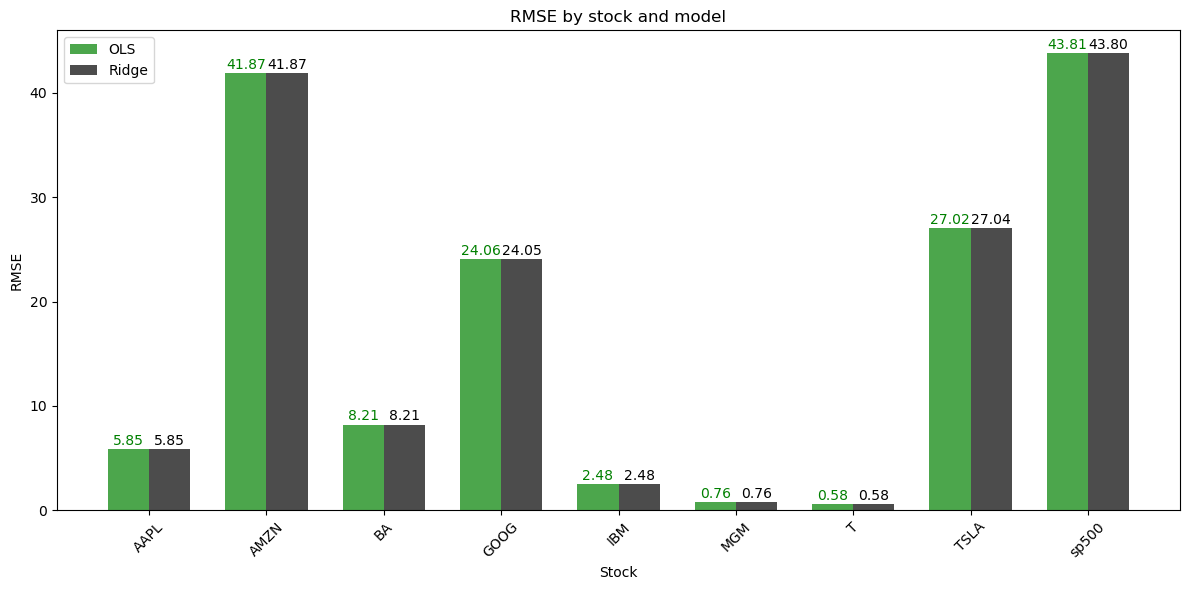

In [84]:
# Get the RMSE for each stock and for each method
rmse_values_OLS = []
rmse_values_Ridge = []

for stock in predictions_ols.columns:
    rmse_OLS = mean_squared_error(to_plot[stock], predictions_ols[stock], squared=False)
    rmse_Ridge = mean_squared_error(to_plot[stock], predictions_ridge[stock], squared=False)
    
    rmse_values_OLS.append(rmse_OLS)
    rmse_values_Ridge.append(rmse_Ridge)

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define the bar width and positions
bar_width = 0.35
index = np.arange(len(predictions_ols.columns))

# Creating the bars
bar1 = ax.bar(index, rmse_values_OLS, bar_width, label='OLS', color='g', alpha=0.7)
bar2 = ax.bar(index + bar_width, rmse_values_Ridge, bar_width, label='Ridge', color='black', alpha=0.7)

# Labeling and plotting
ax.set_xlabel('Stock')
ax.set_ylabel('RMSE')
ax.set_title('RMSE by stock and model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(predictions_ols.columns, rotation=45)
ax.legend()

# Function to add labels on top of the bars
def add_labels(bars, color):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center',
                    color=color)

add_labels(bar1, 'g')  # Add labels for OLS bars with green color
add_labels(bar2, 'black')  # Add labels for Ridge bars with black color

# Display the plot
plt.tight_layout()
plt.show()


### Roos

In [85]:
def compute_Roos(predicted_price, true_price):

    # compute daily returns
    daily_returns = true_price.pct_change(1).dropna()
    daily_returns_predicted = predicted_price.pct_change(1).dropna()

    metrics  = {}
    for stock in daily_returns.columns:

        predicted_stock = daily_returns_predicted[stock]
        true_stock = daily_returns[stock]
        
        #print(stock)
        update_num = 0
        update_denom = 0
        for t in range(len(predicted_stock)):
            update_num += (true_stock.iloc[t] - predicted_stock.iloc[t])**2 
            update_denom += (true_stock.iloc[t])**2
        #print("Roos:", metric)
        metrics[stock] = 1-(update_num/update_denom)
    
    return metrics

Roos_ols = compute_Roos(predictions_ols, test_data.xs('price', axis=1, level=1).dropna())
Roos_ridge = compute_Roos(predictions_ridge, test_data.xs('price', axis=1, level=1).dropna())

The similarity between OLS and Ridge predictions and the actual prices may appear puzzling at first, but it aligns with the concept of price stickiness. OLS seemingly suggests that tomorrow's price will closely mirror today's (beta = 1), effectively amounting to a one-day price shift. To gain a deeper understanding, it's crucial to assess predicted returns against actual returns or implement the strategy. It's a reminder that performance metrics, such as those used by Gu et al., might not be ideal for this context, prompting the exploration of alternative metrics like the proportion of correct directional predictions.

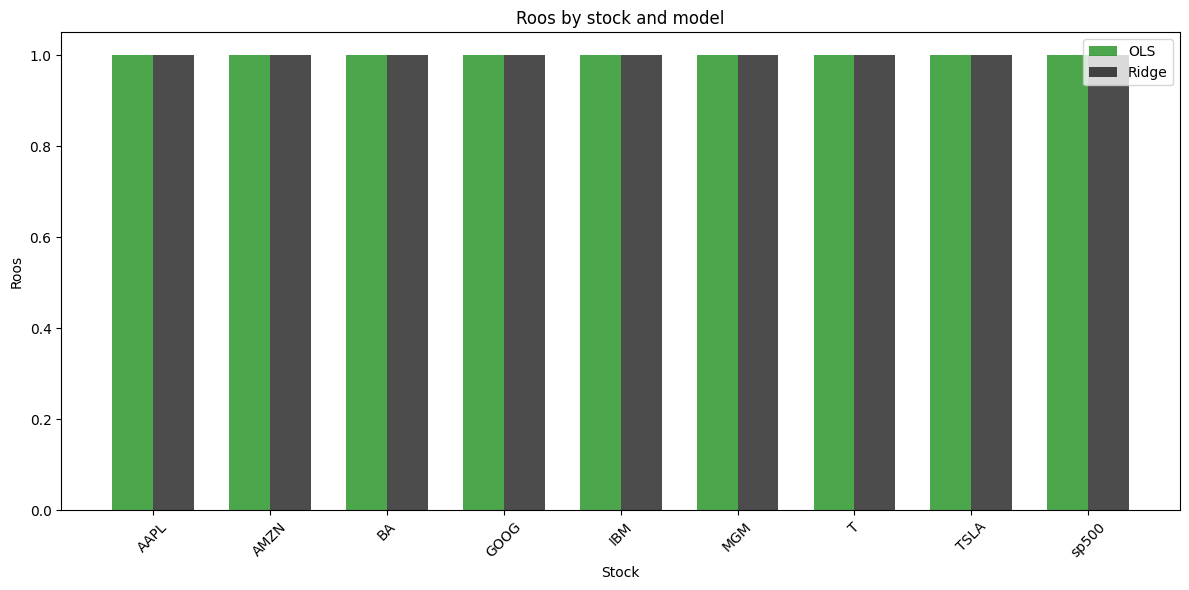

In [ ]:
# plot the Roos for each stock and for each method uing the style of previous graph
# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define the bar width and positions
bar_width = 0.35
index = np.arange(len(predictions_ols.columns))

# Creating the bars
bar1 = ax.bar(index, Roos_ols.values(), bar_width, label='OLS', color='g', alpha=0.7)
bar2 = ax.bar(index + bar_width, Roos_ridge.values(), bar_width, label='Ridge', color='black', alpha=0.7)

# Labeling and plotting
ax.set_xlabel('Stock')
ax.set_ylabel('Roos')
ax.set_title('Roos by stock and model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(predictions_ols.columns, rotation=45)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


Now we create a function able to compute the number of times the model predicted a price change with different sign with respect to the sign of the actual price change

In [ ]:
# function to compute the number of times the model wrongly predicted the direction of the price change
def compute_sign(predicted_price, true_price):

    # compute daily returns
    daily_returns = true_price.pct_change(1).dropna()[1:]
    daily_returns_predicted = predicted_price.pct_change(1).dropna()

    metrics  = {}
    for stock in daily_returns.columns:

        predicted_stock = daily_returns_predicted[stock]
        true_stock = daily_returns[stock]
        
        error = []
        for t in range(len(predicted_stock)):
            if np.sign(predicted_stock.iloc[t]) != np.sign(true_stock.iloc[t]):
                error.append(1)
            else: 
                error.append(0)
        
        metrics[stock] = sum(error)/len(error)
    
    return metrics


In [ ]:
# compute the above mentioed metric
metrics = compute_sign(predictions_ols, test_data.xs('price', axis=1, level=1).dropna())
metrics_ridge = compute_sign(predictions_ridge, test_data.xs('price', axis=1, level=1).dropna())


/tmp/ipykernel_119/1515951809.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


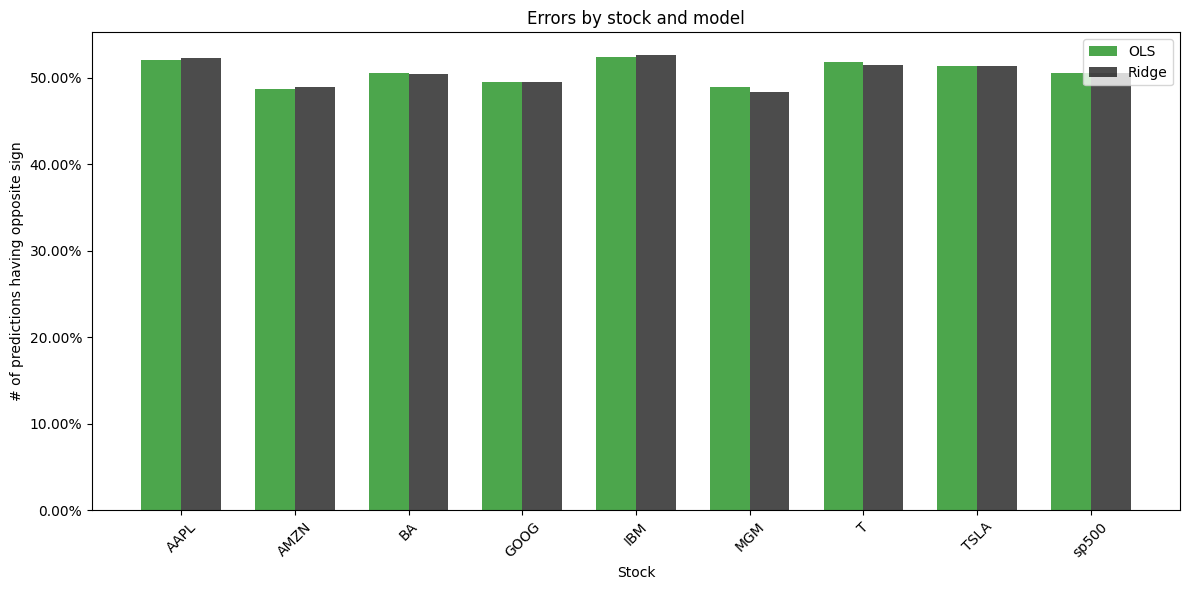

In [ ]:
#Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define the bar width and positions
bar_width = 0.35
index = np.arange(len(metrics))

# Creating the bars
bar1 = ax.bar(index, metrics.values(), bar_width, label='OLS', color='g', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], metrics_ridge.values(), bar_width, label='Ridge', color='black', alpha=0.7)



# Format the plot
plt.xlabel('Stock')
plt.ylabel('# of predictions having opposite sign')
plt.title('Errors by stock and model')
plt.xticks([i + bar_width / 2 for i in index], metrics.keys(), rotation=45)
# show the y axis tick marks as percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.legend()

# Show the plot
plt.tight_layout()
plt.show();


As we can see from the last two plots, both OLS and Ridge obtained very good results in term go RMSE and Roos and poor results in terms of sign difference between predicted and actual price changes. 

These results seems reasonable. Indeed, both RMSE and Roos are metrics that take into account the difference between actual and predicted prices and, since both models make predictions based on the previous day's price, it seems reasonable that the predicted prices are very close to the actual values (generally stock prices do not face high daily variations). Also the the results of the last metric seem reasonable because the two models are very basic models that take as input just two variables (the lagged price and volume), thus the models are not able to correctly predict if the price of a stock will increase or decrease considering just those two variables.

# Task 2 Optional

## using Pm,t

In [ ]:
def train_and_predict_ols_market(training_data_sc, test_data_sc):
    # Create a dictionary to store the models
    models = {}

    # Train linear regression models for each stock in the training data
    for stock in training_data_sc.columns.levels[0]:
        X_train = training_data_sc[stock][['price', 'volume']].shift(1).dropna()
        #taking the sp500 as a proxy for the entire market
        market = training_data['sp500'][['price']].shift(1).dropna()
        X_train = pd.concat([X_train, market], axis=1)
        y_train = training_data_sc[stock]['price'].loc[X_train.index]
        X_train = sm.add_constant(X_train)
        models[stock] = sm.OLS(y_train, X_train).fit()

    # Use the models to predict the price for each stock in the test data
    predictions_sc = pd.DataFrame(index=test_data_sc.index[1:], columns=test_data_sc.columns)
    for stock in test_data_sc.columns.levels[0]:
        X_test = test_data_sc[stock][['price', 'volume']].shift(1).dropna()
        market = test_data['sp500'][['price']].shift(1).dropna()
        X_test = pd.concat([X_test, market], axis=1)
        X_test = sm.add_constant(X_test)
        predictions_sc[stock] = models[stock].predict(X_test)

    # Remove the volume column from the predictions
    predictions_sc = predictions_sc.xs('price', axis=1, level=1).dropna()

    # Inverse transform the predictions
    predictions = pd.DataFrame(index=predictions_sc.index, columns=predictions_sc.columns)

    for stock in predictions_sc.columns:
        predictions[stock] = scalers[(stock, 'price')].inverse_transform(predictions_sc[stock].values.reshape(-1, 1))

    return predictions

# Example usage:
predictions_market = train_and_predict_ols_market(training_data_sc, test_data_sc)


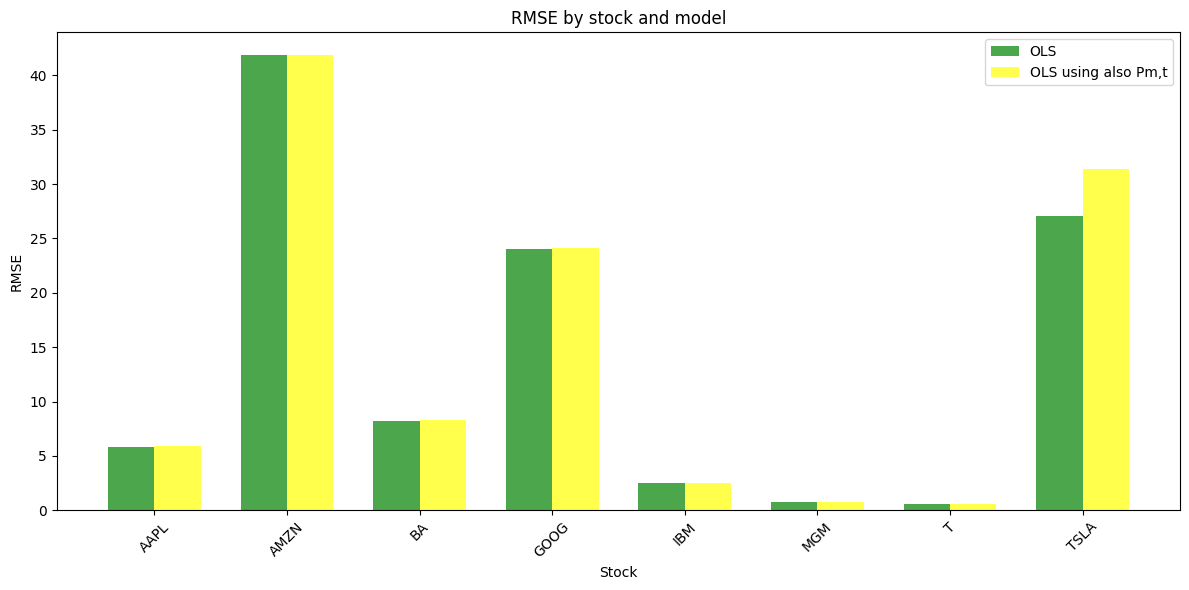

In [ ]:
# Get the RMSE for each stock and for each method
rmse_values_OLS = []
rmse_values_market = []

for stock in predictions_ols.columns[:-1]:
    rmse_OLS = mean_squared_error(test_data[stock, 'price'][1:], predictions_ols[stock], squared=False)
    rmse_market = mean_squared_error(test_data[stock, 'price'][1:], predictions_market[stock], squared=False)
    
    rmse_values_OLS.append(rmse_OLS)
    rmse_values_market.append(rmse_market)

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define the bar width and positions
bar_width = 0.35
index = np.arange(len(predictions_ols.columns[:-1]))

# Creating the bars
bar1 = ax.bar(index, rmse_values_OLS, bar_width, label='OLS', color='g', alpha=0.7)
bar2 = ax.bar(index + bar_width, rmse_values_market, bar_width, label='OLS using also Pm,t', color='yellow', alpha=0.7)

# Labeling and plotting
ax.set_xlabel('Stock')
ax.set_ylabel('RMSE')
ax.set_title('RMSE by stock and model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(predictions_ols.columns[:-1], rotation=45)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_119/3856148528.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


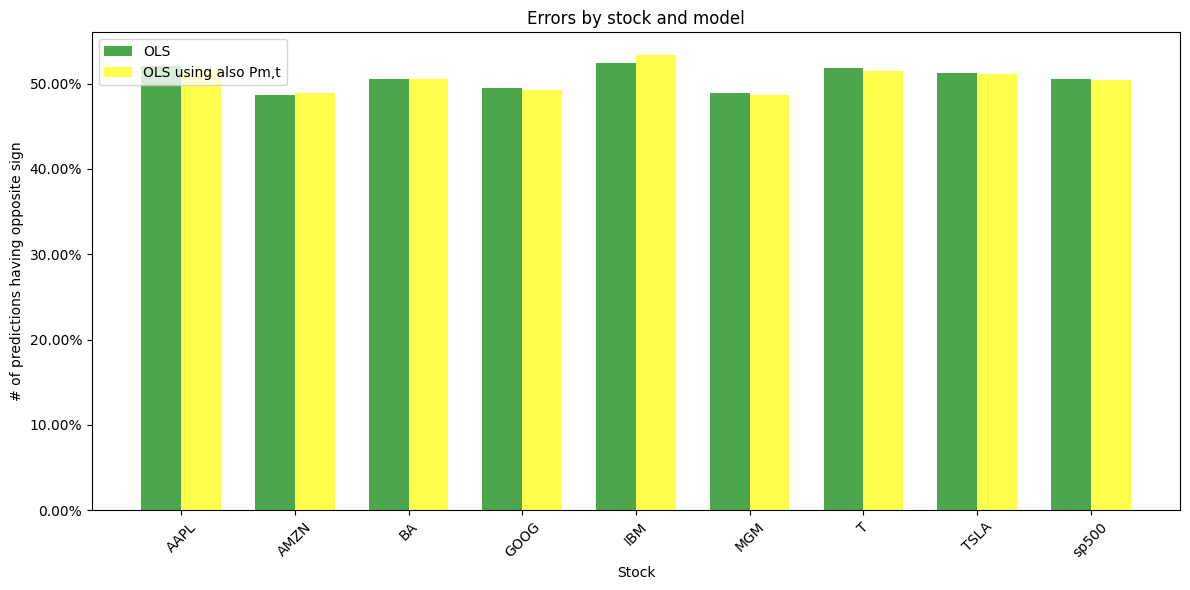

In [ ]:
metrics_market = compute_sign(predictions_market, test_data.xs('price', axis=1, level=1).dropna())

#Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define the bar width and positions
bar_width = 0.35
index = np.arange(len(metrics_market))

# Creating the bars
bar1 = ax.bar(index, metrics.values(), bar_width, label='OLS', color='g', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], metrics_market.values(), bar_width, label='OLS using also Pm,t', color='yellow', alpha=0.7)

# Format the plot
plt.xlabel('Stock')
plt.ylabel('# of predictions having opposite sign')
plt.title('Errors by stock and model')
plt.xticks([i + bar_width / 2 for i in index], metrics.keys(), rotation=45)
# show the y axis tick marks as percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Adding to the models another input (in this case the lagged price of the market) does not seem to improve their performance

# Task 3

## Feedforward Neural Network

<img src="image-20231010-172339.png" width="" align="" />

In [ ]:
def train_and_predict_nn(training_data_sc, test_data_sc):
    # Dictionary to store models
    new_df = pd.DataFrame()

    for stock in training_data_sc.columns.levels[0]:
        extract = training_data_sc.shift(1).dropna()[stock][['price', 'volume']].reset_index(drop=True).rename(columns={'price':'price_lag1', 'volume':'volume_lag1'})
        price = training_data_sc[stock][['price']][1:].reset_index(drop=True)
        extract = pd.concat([extract,price],axis=1)
        new_df=pd.concat([new_df, extract],axis=0)


    # Generate predictor matrix (X) and response vector (y) for training
    X_train = new_df[['price_lag1', 'volume_lag1']]
    y_train = new_df['price']  
        
    # Create the neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),  # Input layer
        tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer
        tf.keras.layers.Dense(1)  # Output layer
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)  # setting verbose=0 to suppress the training logs
    
    
    
    new_df = pd.DataFrame()

    for stock in test_data_sc.columns.levels[0]:
        extract = test_data_sc.shift(1).dropna()[stock][['price', 'volume']].reset_index(drop=True).rename(columns={'price':'price_lag1', 'volume':'volume_lag1'})
        price = test_data_sc[stock][['price']][1:].reset_index(drop=True)
        extract = pd.concat([extract,price],axis=1)
        new_df=pd.concat([new_df, extract],axis=0)


    # 3. Predict using this single model
    predictions_sc = pd.DataFrame(index=test_data_sc.index[1:], columns=test_data_sc.columns)
    for stock in test_data_sc.columns.levels[0]:
        X_test = test_data_sc[stock][['price', 'volume']].shift(1).dropna()
        X_test = np.array(X_test)  # Convert X_test to a numpy array
        predictions_stock = model.predict(X_test)
        predictions_sc[stock] = predictions_stock.flatten()

        
    # Remove volume column from predictions
    predictions_sc = predictions_sc.xs('price', axis=1, level=1).dropna()

    # Inverse transform the predictions (assuming you have `scalers` dictionary like in OLS code)
    predictions = pd.DataFrame(index=predictions_sc.index, columns=predictions_sc.columns)
    for stock in predictions_sc.columns:
        predictions[stock] = scalers[(stock, 'price')].inverse_transform(predictions_sc[stock].values.reshape(-1, 1)).flatten()

    return predictions


In [ ]:
predictions_FNN = train_and_predict_nn(training_data_sc, test_data_sc)

17/17 [==============================] - 0s 4ms/step


In [ ]:
metrics_FNN = compute_sign(predictions_FNN, test_data.xs('price', axis=1, level=1).dropna())
metrics_FNN

{'AAPL': 0.5278810408921933,
 'AMZN': 0.4851301115241636,
 'BA': 0.5055762081784386,
 'GOOG': 0.49256505576208176,
 'IBM': 0.5260223048327137,
 'MGM': 0.4888475836431227,
 'T': 0.5185873605947955,
 'TSLA': 0.5148698884758365,
 'sp500': 0.5018587360594795}

## Random Forest

In [ ]:
def train_and_predict_rf(training_data_sc, test_data_sc):
    # Dictionary to store models
    models = {}
    
    # Train Random Forest models for each stock in the training data
    for stock in training_data_sc.columns.levels[0]:
        X_train_df = training_data_sc[stock][['price', 'volume']].shift(1).dropna()
        y_train = training_data_sc[stock]['price'].loc[X_train_df.index].values
        X_train = X_train_df.values

        # Create the Random Forest model
        model = RandomForestRegressor(n_estimators=100)  # Default number of trees is 100
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Store the trained model
        models[stock] = model
    
    # Use the models to predict the price for each stock in the test data
    predictions_sc = pd.DataFrame(index=test_data_sc.index[1:], columns=test_data_sc.columns)
    for stock in test_data_sc.columns.levels[0]:
        X_test_df = test_data_sc[stock][['price', 'volume']].shift(1).dropna()
        X_test = X_test_df.values

        predictions_sc[stock, 'price'] = models[stock].predict(X_test)
    
    # Remove volume column from predictions
    predictions_sc = predictions_sc.xs('price', axis=1, level=1).dropna()

    # Inverse transform the predictions (assuming you have `scalers` dictionary like in OLS code)
    predictions = pd.DataFrame(index=predictions_sc.index, columns=predictions_sc.columns)
    for stock in predictions_sc.columns:
        predictions[stock] = scalers[(stock, 'price')].inverse_transform(predictions_sc[stock].values.reshape(-1, 1)).flatten()

    return predictions


In [ ]:
predictions_RF = train_and_predict_rf(training_data_sc, test_data_sc)

In [ ]:
metrics_RF = compute_sign(predictions_RF, test_data.xs('price', axis=1, level=1).dropna())

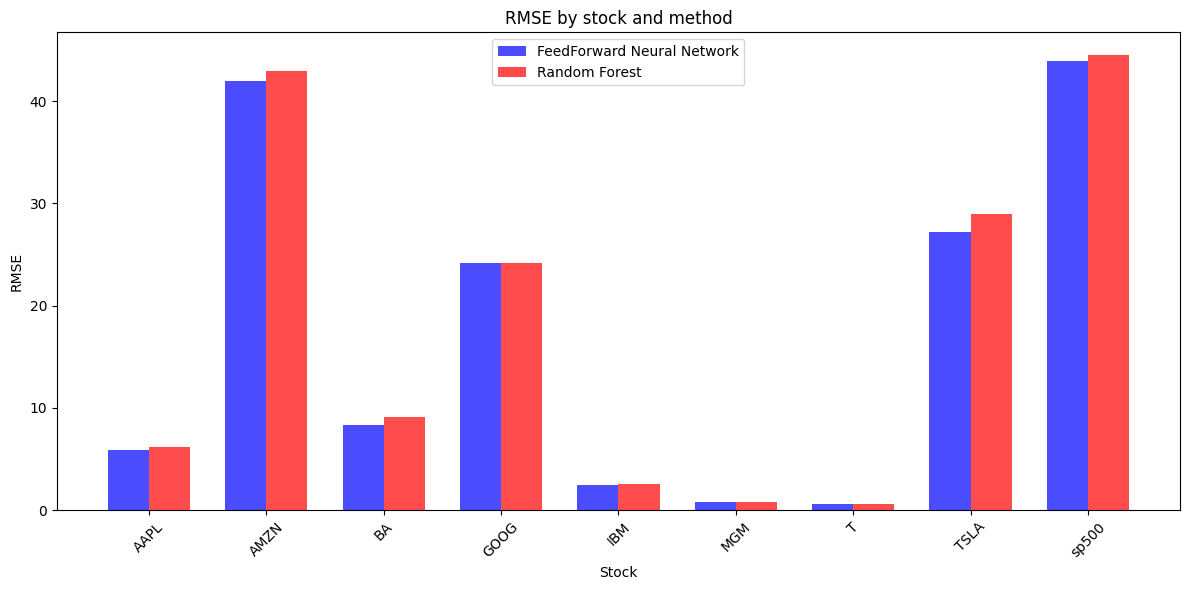

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the RMSE for each stock and for each method
rmse_values_FNN = []
rmse_values_RF = []

for stock in predictions_RF.columns:
    rmse_FNN = mean_squared_error(test_data[stock, 'price'][1:], predictions_FNN[stock], squared=False)
    rmse_RF = mean_squared_error(test_data[stock, 'price'][1:], predictions_RF[stock], squared=False)

    rmse_values_FNN.append(rmse_FNN)
    rmse_values_RF.append(rmse_RF)

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define the bar width and positions
bar_width = 0.35
index = np.arange(len(predictions_RF.columns))

# Creating the bars
bar1 = ax.bar(index, rmse_values_FNN, bar_width, label='FeedForward Neural Network', color='b', alpha=0.7)
bar2 = ax.bar(index + bar_width, rmse_values_RF, bar_width, label='Random Forest', color='r', alpha=0.7)

# Labeling and plotting
ax.set_xlabel('Stock')
ax.set_ylabel('RMSE')
ax.set_title('RMSE by stock and method')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(predictions_RF.columns, rotation=45)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


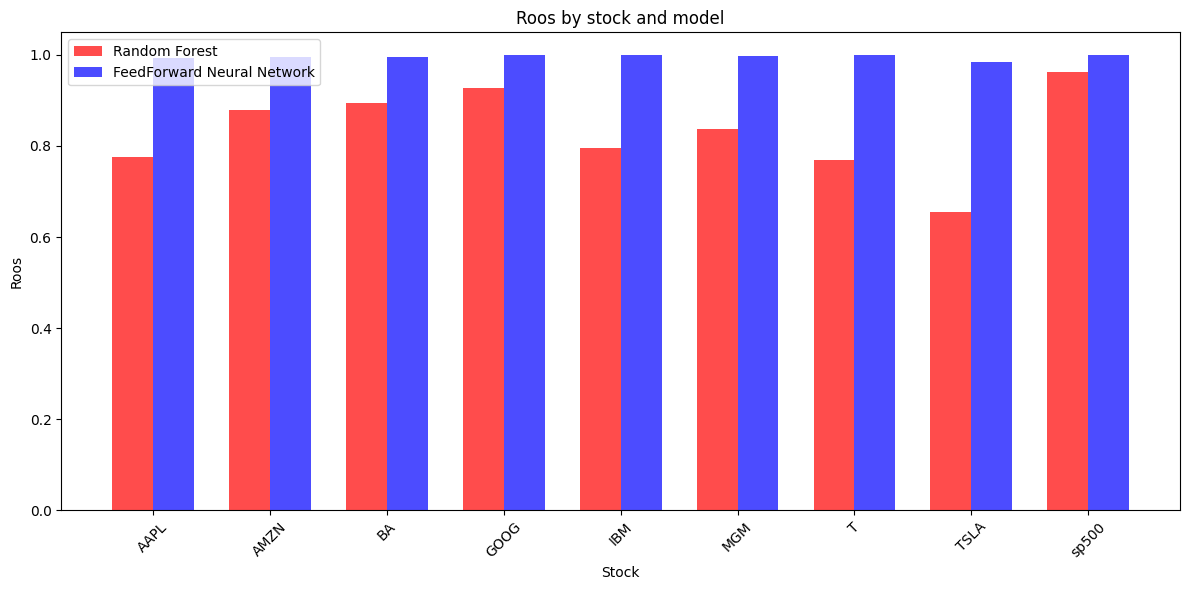

In [ ]:
Roos_RF = compute_Roos(predictions_RF, test_data.xs('price', axis=1, level=1).dropna())
Roos_FNN = compute_Roos(predictions_FNN, test_data.xs('price', axis=1, level=1).dropna())

# plot the Roos for each stock and for each method uing the style of previous graph
# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define the bar width and positions
bar_width = 0.35
index = np.arange(len(predictions_ols.columns))

# Creating the bars
bar1 = ax.bar(index, Roos_RF.values(), bar_width, label='Random Forest', color='r', alpha=0.7)
bar2 = ax.bar(index + bar_width, Roos_FNN.values(), bar_width, label='FeedForward Neural Network', color='b', alpha=0.7)

# Labeling and plotting
ax.set_xlabel('Stock')
ax.set_ylabel('Roos')
ax.set_title('Roos by stock and model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(predictions_ols.columns, rotation=45)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_119/4151057323.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


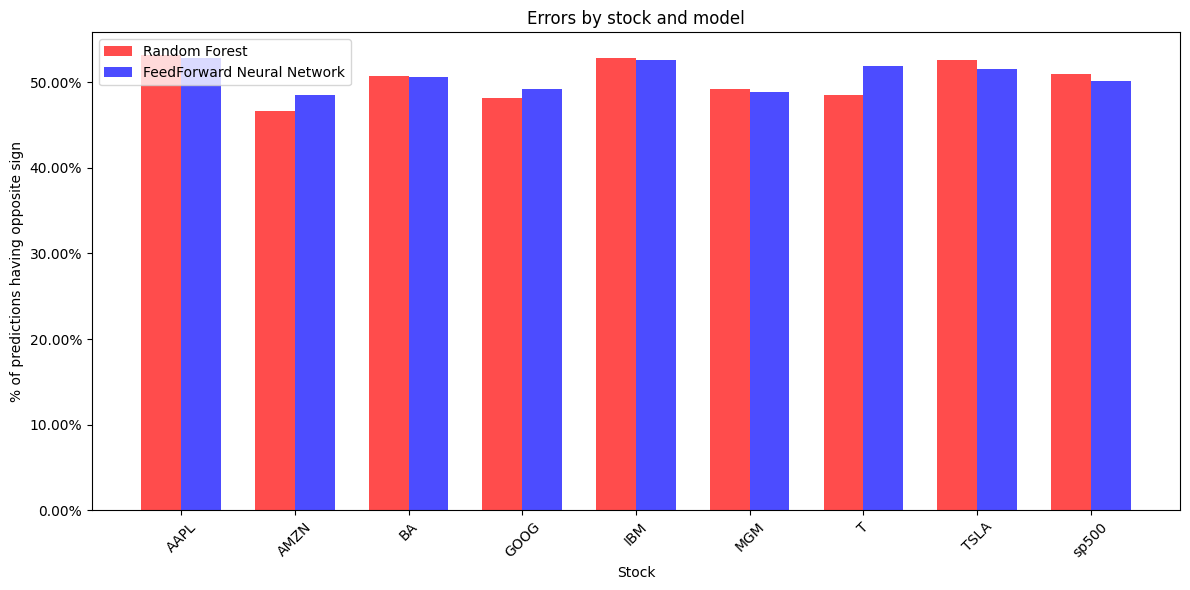

In [ ]:
#Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define the bar width and positions
bar_width = 0.35
index = np.arange(len(metrics_market))

# Creating the bars
bar1 = ax.bar(index, metrics_RF.values(), bar_width, label='Random Forest', color='r', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], metrics_FNN.values(), bar_width, label='FeedForward Neural Network', color='b', alpha=0.7)

# Format the plot
plt.xlabel('Stock')
plt.ylabel('% of predictions having opposite sign')
plt.title('Errors by stock and model')
plt.xticks([i + bar_width / 2 for i in index], metrics.keys(), rotation=45)
# show the y axis tick marks as percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Comment 1

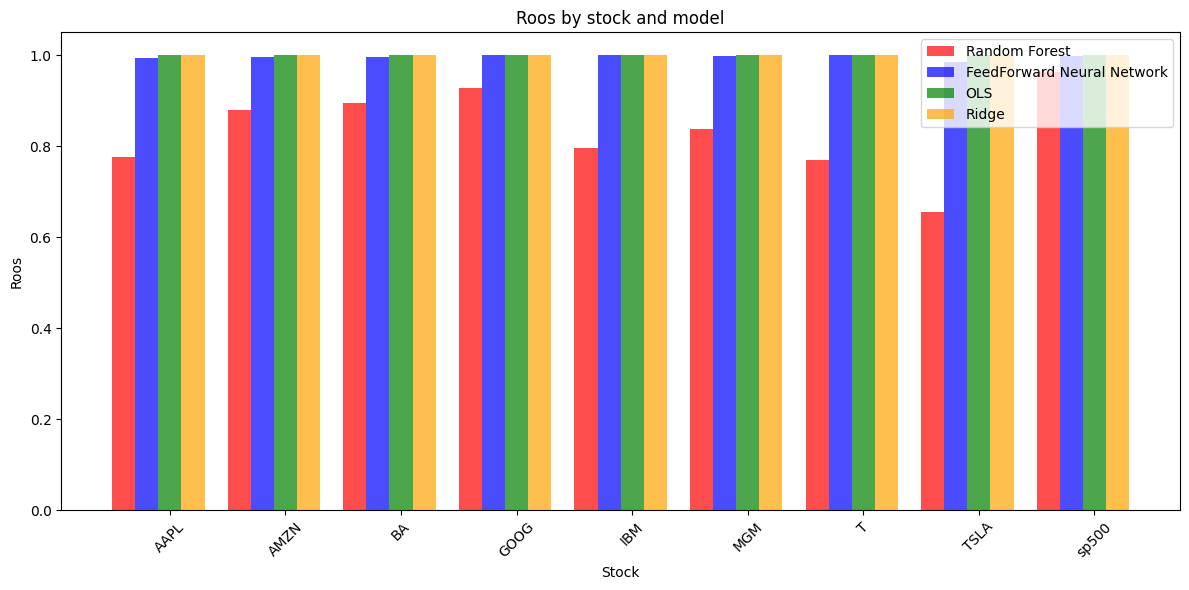

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define the bar width and positions
bar_width = 0.2  # Reduced bar width to fit more models on the plot
index = np.arange(len(predictions_ols.columns))

# Creating the bars for Random Forest, FNN, Roos_ols, and Roos_ridge
bar1 = ax.bar(index, Roos_RF.values(), bar_width, label='Random Forest', color='r', alpha=0.7)
bar2 = ax.bar(index + bar_width, Roos_FNN.values(), bar_width, label='FeedForward Neural Network', color='b', alpha=0.7)
bar3 = ax.bar(index + 2*bar_width, Roos_ols.values(), bar_width, label='OLS', color='g', alpha=0.7)
bar4 = ax.bar(index + 3*bar_width, Roos_ridge.values(), bar_width, label='Ridge', color='orange', alpha=0.7)

# Labeling and plotting
ax.set_xlabel('Stock')
ax.set_ylabel('Roos')
ax.set_title('Roos by stock and model')
ax.set_xticks(index + 2*bar_width)  # Adjust the tick positions
ax.set_xticklabels(predictions_ols.columns, rotation=45)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

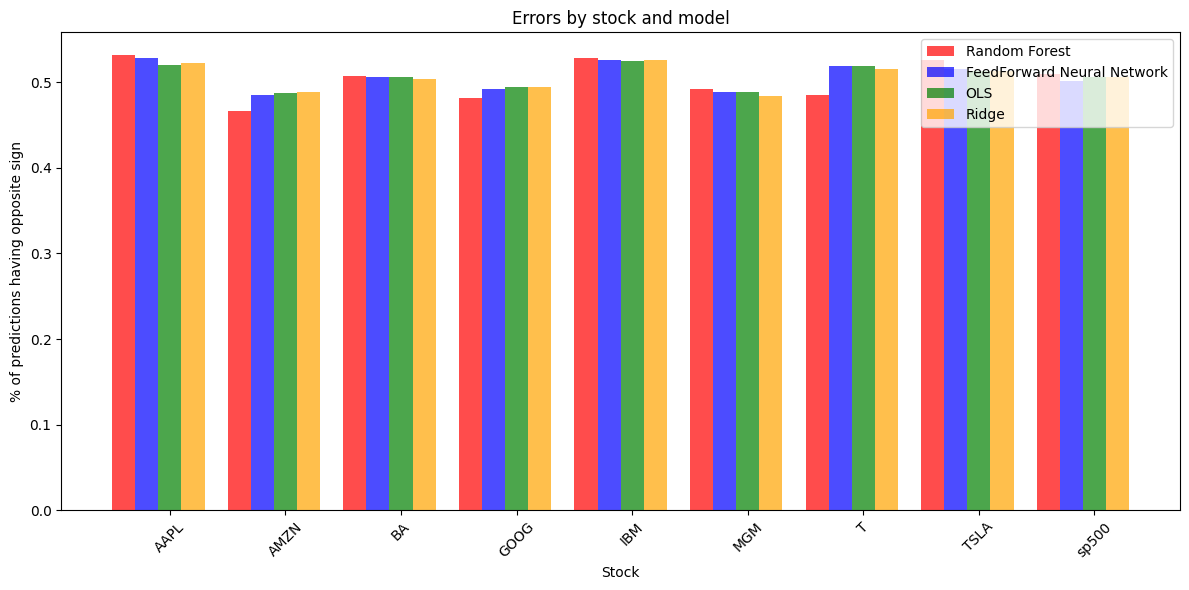

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define the bar width and positions
bar_width = 0.2  # Reduced bar width to fit more models on the plot
index = np.arange(len(predictions_ols.columns))

# Creating the bars for Random Forest, FNN, Roos_ols, and Roos_ridge
bar1 = ax.bar(index, metrics_RF.values(), bar_width, label='Random Forest', color='r', alpha=0.7)
bar2 = ax.bar(index + bar_width, metrics_FNN.values(), bar_width, label='FeedForward Neural Network', color='b', alpha=0.7)
bar3 = ax.bar(index + 2*bar_width, metrics.values(), bar_width, label='OLS', color='g', alpha=0.7)
bar4 = ax.bar(index + 3*bar_width, metrics_ridge.values(), bar_width, label='Ridge', color='orange', alpha=0.7)

# Labeling and plotting
ax.set_xlabel('Stock')
ax.set_ylabel('% of predictions having opposite sign')
ax.set_title('Errors by stock and model')
ax.set_xticks(index + 2*bar_width)  # Adjust the tick positions
ax.set_xticklabels(predictions_ols.columns, rotation=45)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

Looking at the RMSE, Roos, and the sign metric we can see the the simpler methods performed a bit better. We think this is due to the fact that we are only using two variables and models like random forests and neural networks outperform OLS in settings with a high number of inputs. If we look at 

We think we cannot make a useful comparison between our results and the results of the paper because the model used in the paper take as input a lot of variables (about 90) while our models take just 2/3 inputs.

## Comment 2

# Task 4 Optional

In [ ]:
tickers

['AAPL', 'AMZN', 'BA', 'GOOG', 'IBM', 'MGM', 'T', 'TSLA']

In [ ]:
for stock in tickers:
    df[stock, 'price_lag1'] = df[stock]['price'].shift(1)
    df[stock, 'volume_lag1'] = df[stock]['volume'].shift(1)

df = df.sort_index(axis=1, level=0)


scalers={}
df1 = df.copy()
for stock in tickers:
    for measure in ['price','price_lag1', 'volume', 'volume_lag1']:
        sc = MinMaxScaler(feature_range=(0, 1))
        df1[stock, measure] = sc.fit_transform(df[stock, measure].values.reshape(-1, 1))
        scalers[(stock, measure)] = sc
df1.head()
del df1['sp500']

In [ ]:
def investment_strategy(df, df1, model_ridge, scalers, wealth, top_stocks):   
    

    for day in df1.index[1:]:
        pred_returns = {}
        actual_returns  = {}

        for stock in df1.columns.levels[0]:
            if stock == 'sp500':
                continue
            
            regressors = df1[stock].loc[day, ['price_lag1', 'volume_lag1']]
            regressors = pd.DataFrame(regressors).T
            price_pred = model_ridge.predict(regressors)
            

            price_pred = scalers[(stock, 'price')].inverse_transform(price_pred.reshape(-1, 1))

            """print(stock)
            print(f"price_pred is: \t {price_pred}")
            print(f"real price is: \t {df[stock].loc[day, 'price']}")
            print((price_pred - df[stock].loc[day, 'price_lag1']) / df[stock].loc[day, 'price_lag1'])"""
            
            pred_returns[stock] = (price_pred - df[stock].loc[day, 'price_lag1']) / df[stock].loc[day, 'price_lag1']
            actual_returns[stock] = (df[stock].loc[day, 'price'] - df[stock].loc[day, 'price_lag1']) / df[stock].loc[day, 'price_lag1']
        
        pred_returns = dict(sorted(pred_returns.items(), key=lambda item: item[1], reverse=True))
        selected_stock = list(pred_returns.keys())[:top_stocks]
        portfolio = [wealth/top_stocks for i in range(top_stocks)]

        for pos, stock in enumerate(selected_stock):
            portfolio[pos] = portfolio[pos] * (1 + actual_returns[stock])
        
        wealth = sum(portfolio)

    return wealth

investment_strategy(df, df1, model_ridge, scalers, 100, 4)

1298.8807457118235

In [ ]:
def investment_strategy(df, df1, model_ridge, scalers, wealth, top_stocks):
    wealth_history = []

    for day in df1.index[1:]:
        pred_returns = {}
        actual_returns = {}

        for stock in df1.columns.levels[0]:
            if stock == 'sp500':
                continue

            regressors = df1[stock].loc[day, ['price_lag1', 'volume_lag1']]
            regressors = pd.DataFrame(regressors).T
            price_pred = model_ridge.predict(regressors)

            price_pred = scalers[(stock, 'price')].inverse_transform(price_pred.reshape(-1, 1))

            pred_price_lag1 = df[stock].at[day, 'price_lag1']
            current_price = df[stock].at[day, 'price']

            pred_returns[stock] = (price_pred - pred_price_lag1) / pred_price_lag1
            actual_returns[stock] = (current_price - pred_price_lag1) / pred_price_lag1

        pred_returns = dict(sorted(pred_returns.items(), key=lambda item: item[1], reverse=True))
        selected_stock = list(pred_returns.keys())[:top_stocks]
        portfolio = [wealth / top_stocks for _ in range(top_stocks)]

        portfolio = [portfolio[i] * (1 + actual_returns[stock]) for i, stock in enumerate(selected_stock)]
        wealth = sum(portfolio)
        wealth_history.append(wealth)

    return wealth, wealth_history

final_wealth, wealth_history = investment_strategy(df, df1, model_ridge, scalers, 100, 4)
print("Final Wealth:", final_wealth)
print("Wealth History:", wealth_history)

Final Wealth: 1298.8807457118235
Wealth History: [95.12695475336591, 100.01565207169332, 101.48371729807477, 102.19596476910472, 101.12220373591896, 101.06723130875844, 101.34028509982056, 103.69339321054389, 105.06219099579836, 105.58615549545192, 105.56716489304434, 105.64471078847353, 104.48021391663382, 105.28753388194691, 107.5896102694339, 107.44118648506532, 107.61506374502765, 108.62793488049721, 110.20536855941744, 108.70632783827887, 110.40264696111458, 112.47190171925894, 111.05155532435933, 111.12293858231129, 112.18638495065838, 112.62132509094864, 112.1607341629831, 112.25800319224021, 112.06657786348407, 111.73138253084748, 113.20791142183697, 112.53273677964563, 113.58367220263949, 113.13058220046653, 112.14335012302871, 110.97824204254937, 111.7867924340644, 113.17527875355708, 113.93378952309153, 115.30866847787682, 116.68022247248736, 117.12948646539263, 117.11567800915654, 117.39302125596058, 118.04145409016147, 119.2446703186416, 119.09189357255941, 117.97186897724

In [ ]:
wealth_history = pd.DataFrame(wealth_history,index = df.index[1:])

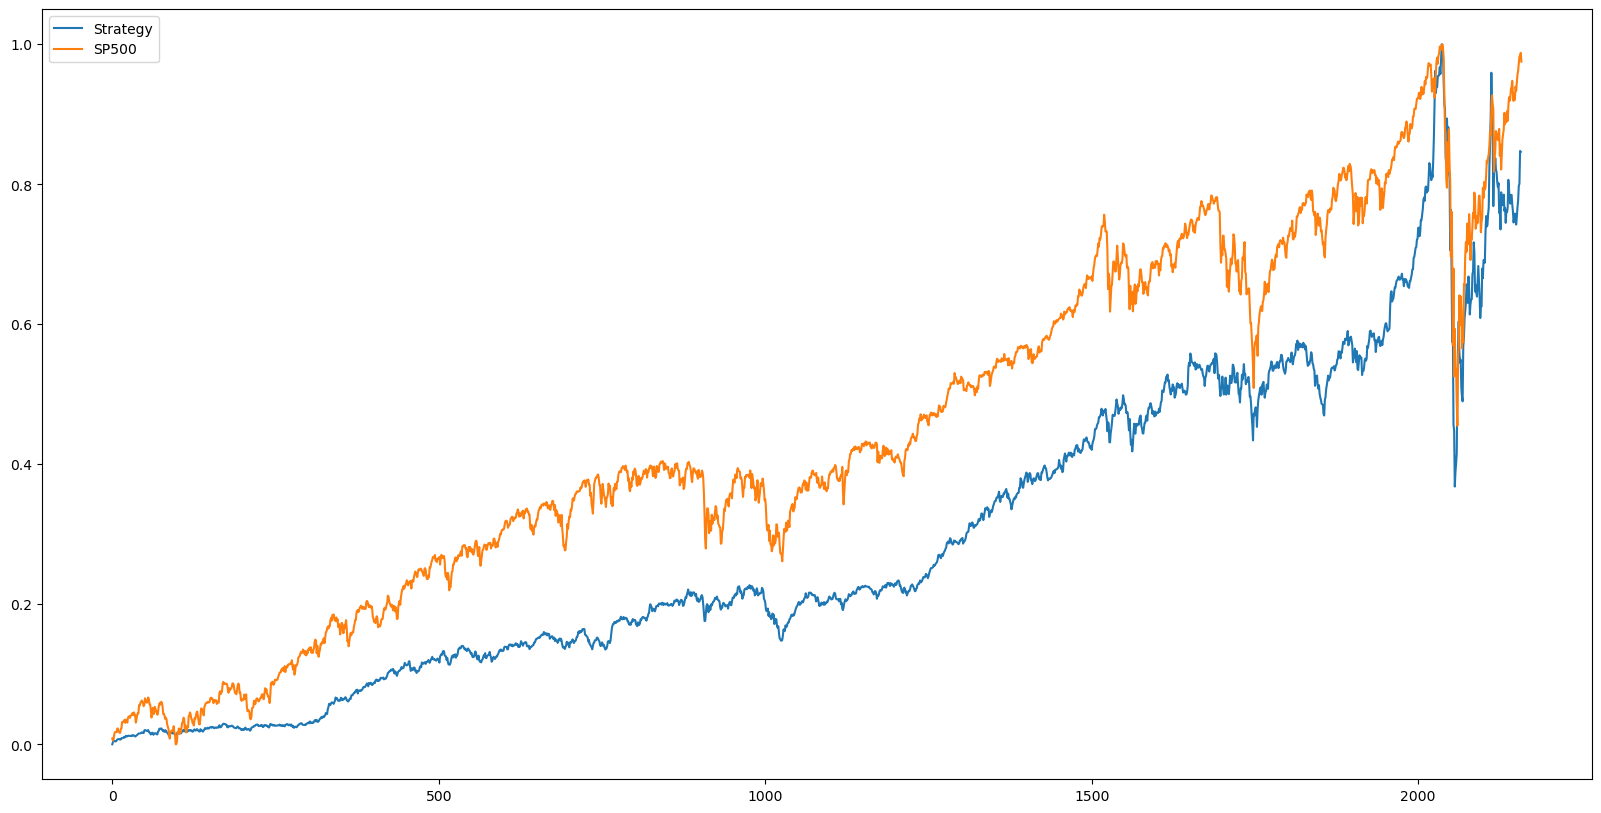

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
normalized_wealth_history = scaler.fit_transform(np.array(wealth_history).reshape(-1, 1))
normalized_sp500 = scaler.fit_transform(np.array(df['sp500']['price']).reshape(-1, 1))

# Plot the normalized data
plt.figure(figsize=(20, 10))
plt.plot(normalized_wealth_history, label='Strategy')
plt.plot(normalized_sp500, label='SP500')
plt.legend()
plt.show()
#add x axis from wealth_history.index[1:]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b8890790-c7a3-42d0-8ce4-3014946c2cc2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>